# Portfolio
We implement an portfolio optimization problem for tech companies, i.e.,

* Amazon

* Apple 

* eBay

* Facebook

* Google

The goal is to minimize risk of the portfolio with a constraint on the minimum returns.

\begin{align}
\text{Minimize} \quad \frac{1}{2} x^T & \Sigma x\\
\mu^T x &\geq R\\
\sum_{i=1}^5x_i&=1\\
x&\geq0
\end{align}






# Don't forget to instal cvxpy
In a code cell, write and run:   !pip install cvxpy


In [1]:
import numpy as np
import math
import cvxpy as cvx
from numpy import matrix 
from cvxpy import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
R=0.15/250
mu=matrix([0.00183,0.0005,0.00064,0.00093,0.00081])
Cov=matrix([[0.000410273, 2.60E-06,1.01688E-05,-1.11913E-05,4.33E-06],[2.60E-06,0.000213984, 5.96877E-05,6.53986E-05, 5.68801E-05],[1.01688E-05,5.96877E-05, 0.000290081, 2.57951E-05, 5.41419E-05],[-1.11913E-05, 6.53986E-05, 2.57951E-05, 0.000255913, 9.74451E-05],[4.33E-06, 5.68801E-05,5.41419E-05, 9.74451E-05,0.000209841]])
x=cvx.Variable(5)


#solution
#prob = cvx.Problem(objective, c)
#result = prob.solve()
#Prob 1
risk=quad_form(x, Cov)
rr=sum_entries(mu*x)
prob1 = Problem(Minimize(risk ), 
               [rr>=R,sum_entries(x) == 1, 
                x >= 0])
prob1.solve()
print(x.value)

[[ 0.20201442]
 [ 0.23051853]
 [ 0.18158234]
 [ 0.18339937]
 [ 0.20248534]]


In [2]:
## Simulating one path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
T = 250
m=5
B=100
mu=[0.00183,0.0005,0.00064,0.00093,0.00081]
Cov=matrix([[0.000410273, 2.60E-06,1.01688E-05,-1.11913E-05,4.33E-06],[2.60E-06,0.000213984, 5.96877E-05,6.53986E-05, 5.68801E-05],[1.01688E-05,5.96877E-05, 0.000290081, 2.57951E-05, 5.41419E-05],[-1.11913E-05, 6.53986E-05, 2.57951E-05, 0.000255913, 9.74451E-05],[4.33E-06, 5.68801E-05,5.41419E-05, 9.74451E-05,0.000209841]])
y = np.zeros((T+1,m))
y[0]=[x.value.item(0),x.value.item(1),x.value.item(2),x.value.item(3),x.value.item(4)]
for i in range(T):
    rr=np.random.multivariate_normal(mu,Cov)
    y[i+1]=y[i]*(1+rr)
sum(y[T])*B

147.45812304207107

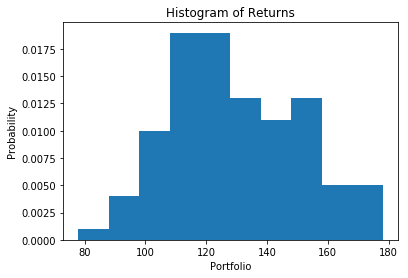

In [44]:
# Simulation
import numpy as np
import matplotlib.pyplot as plt
simu=100 # I am doing 50 simulations
T = 250 # 250 trading days
m=5 # I have 5 assets
B=100 # Budget is $100
z_values = []
for q in range(simu):
    y = np.zeros((T+1,m))
    y[0]=[x.value.item(0),x.value.item(1),x.value.item(2),x.value.item(3),x.value.item(4)]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

plt.hist(z_values, density=True )
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

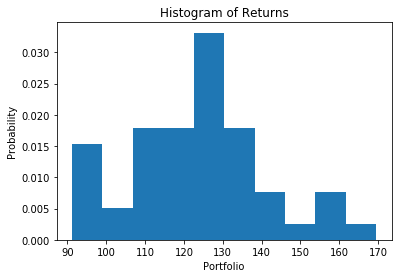

In [41]:
# Simulation
import numpy as np
import matplotlib.pyplot as plt
simu=50
T = 250
m=5
B=100
z_values = []
for q in range(simu):
    #mu=[0.00183,0.0005,0.00064,0.00093,0.00081]
    #Cov=matrix([[0.000410273, 2.60E-06,1.01688E-05,-1.11913E-05,4.33E-06],[2.60E-06,0.000213984, 5.96877E-05,6.53986E-05, 5.68801E-05],[1.01688E-05,5.96877E-05, 0.000290081, 2.57951E-05, 5.41419E-05],[-1.11913E-05, 6.53986E-05, 2.57951E-05, 0.000255913, 9.74451E-05],[4.33E-06, 5.68801E-05,5.41419E-05, 9.74451E-05,0.000209841]])
    y = np.zeros((T+1,m))
    #rr=np.random.multivariate_normal(mu,Cov)
    y[0]=[x.value.item(0),x.value.item(1),x.value.item(2),x.value.item(3),x.value.item(4)]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    z_values.append(sum(y[T])*B)

    
plt.hist(z_values, density=True )
plt.xlabel('Portfolio')
plt.ylabel('Probability')
plt.title('Histogram of Returns')
plt.show()

In [40]:
import math
np.mean(z_values)
np.var(z_values)
std=math.sqrt(np.var(z_values))
[np.mean(z_values)-1.96*std,np.mean(z_values)+1.96*std]


[89.616778163592969, 165.49120679025611]